# 데이터 분석의 장벽을 낮추는 판다스 핀셋 강의

이것만 하면 데이터 분석도 어렵지 않다!!!!

## 목차

1. 데이터 살펴보기
    - .unique(), .nunique()
    - .nlargest(), .nsmallest()
    - set().intersection(), set().difference()
    - .duplicated()
    - .sample()
    - indexing
    - slicing


2. 데이터 살펴보기 심화
    - .loc[], .iloc[]
    - .str.contains()
    - .groupby()
    - .stack(), .unstack()


3. 데이터 합치기
    - .merge(), .concat()


4. 데이터 버리고 정리하기
    - .drop()
    - .drop_duplicates()
    - .set_index()
    - .reset_index()
    - .sort_values(), .sort_index(), sorted()
    - .rename()
    


일단 연습용 데이터를 불러와주자

In [182]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
TRAIN_P_PATH = r'C:\Users\Wyatt\wyatt37/Data/systemError/train_problem_data.csv'
TRAIN_Q_PATH = r'C:\Users\Wyatt\wyatt37/Data/systemError/train_quality_data.csv'
TRAIN_E_PATH = r'C:\Users\Wyatt\wyatt37/Data/systemError/train_err_data.csv'

In [170]:
# 연습용이니 100000만개만 가져옵니다.
train_e = pd.read_csv(TRAIN_E_PATH, nrows=100000)
train_q = pd.read_csv(TRAIN_Q_PATH, nrows=100000)
train_p = pd.read_csv(TRAIN_P_PATH)

C:\Users\Wyatt\anaconda3\envs\wyatt37\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8,10,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
train_e.shape, train_q.shape, train_p.shape

((100000, 6), (100000, 16), (5429, 2))

In [16]:
train_e.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


In [17]:
train_q.head()

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [127]:
train_p = train_p.sort_values('user_id')[:10].reset_index(drop=True)

## 1. 데이터 살펴보기

### 1.1 unique(), nunique()

unique()는 고유한 값을 반환, nunique()는 고유한 값의 수를 반환

In [11]:
train_e.errtype.unique()

array([15, 12, 11, 16,  4, 26, 10, 14,  3, 13,  6,  7, 27, 28, 31, 33, 22,
       41,  5, 40, 34, 37, 36, 23, 18, 20, 19, 21, 42, 24, 25, 17, 38, 39,
       35, 32, 30,  2,  1], dtype=int64)

In [12]:
train_e.errtype.nunique()

39

그럼 이걸 어따 씁니까?! 그건 다른 것도 배운 뒤에 봅시다.

### 1.2 nlargest(), nsmallest()

이놈들은 특정 컬럼에서 가장 큰 값들, 가장 작은 값들을 순차대로 보여주는 놈들입니다.

In [33]:
train_q.nlargest(5, # 몇개나 보여줄까요? 인자를 넣는다. (default=5)
                 'quality_1') # 어떤 컬럼을 기준으로? 인자를 넣는다.

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
11551,20201122200000,10246,04.33.1261,0.0,19,0.0,0,0,0,0,0,38,0,0,0,0
4515,20201119220000,10094,04.16.3553,0.0,17,0.0,0,0,0,0,0,20,0,0,0,0
54172,20201115092000,11030,05.15.2138,0.0,16,0.0,0,0,"2,287",0,0,43,0,"3,796",0,0
53771,20201104223000,11030,05.15.2138,0.0,15,0.0,0,0,"1,407",0,0,15,0,"1,407",1,1
11499,20201121000000,10246,04.33.1261,0.0,14,0.0,0,0,0,0,0,14,0,0,0,0


In [32]:
train_q.nsmallest(5, 'quality_1')

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
72,20201118001000,10002,05.15.2138,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,3,-1,0
73,20201118001000,10002,05.15.2138,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,3,-1,0
130,20201102232000,10004,04.22.1750,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,3,-1,0
131,20201102232000,10004,04.22.1750,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,3,-1,0
158,20201119040000,10005,04.22.1750,-1.0,-1,-1.0,0,0,-1,-1,36,0,0,4,-1,0


시리즈에도 적용이 가능하다.

In [34]:
train_q.quality_1.nlargest()

11551    19
4515     17
54172    16
53771    15
11499    14
Name: quality_1, dtype: int64

In [35]:
train_q.quality_1.nsmallest()

72    -1
73    -1
130   -1
131   -1
158   -1
Name: quality_1, dtype: int64

### 1.3 set().intersection(), set().difference()

intetsection()과 difference()는 중복값과 겹치지 않는 값을 반환한다. 다만 구조상으로 set을 받는다.

In [37]:
set(train_e.fwver).intersection(train_q.fwver)

{'03.11.1149',
 '03.11.1167',
 '04.16.3553',
 '04.16.3571',
 '04.22.1684',
 '04.22.1750',
 '04.22.1778',
 '04.33.1149',
 '04.33.1185',
 '04.33.1261',
 '05.15.2138',
 '05.66.3237',
 '05.66.3571'}

In [45]:
set(train_e.user_id).difference(train_q.user_id)

{10001,
 10003,
 10007,
 10008,
 10009,
 10011,
 10014,
 10015,
 10016,
 10017,
 10018,
 10023,
 10024,
 10026,
 10028,
 10029,
 10031,
 10034,
 10035,
 10040,
 10041,
 10042,
 10043,
 10044,
 10048,
 10053,
 10055,
 10059,
 10061,
 10063,
 10064,
 10065,
 10067,
 10069,
 10070,
 10071,
 10073,
 10079,
 10082,
 10083,
 10084,
 10086,
 10088,
 10091,
 10095}

언제 씁니까?! train data와 test data의 value가 겹치지 않는 경우가 종종 있다. 이런 부분을 전처리 해주어야 한다.

### 1.4 sample()

랜덤으로 행을 반환

In [63]:
train_e.sample(5)

,user_id,time,model_nm,fwver,errtype,errcode
75917,10077,20201105224332,model_1,04.16.3553,15,1
92740,10087,20201119071153,model_1,04.16.3553,31,1
4196,10005,20201108033439,model_0,04.22.1750,15,1
10069,10010,20201113073529,model_1,04.16.3553,22,1
12789,10010,20201122143555,model_1,04.16.3553,23,connection timeout


언제 씁니까?! 언젠간 쓸 일이 있게 됩니다. 의외로 많이.

### 1.5 indexing과 slicing

인덱싱과 슬라이싱은 가장 기본이 되면서 수 많은 응용이 가능한 영역이다!

In [74]:
train_e.user_id[0]

10000

In [75]:
train_e.user_id[0:5]

0    10000
1    10000
2    10000
3    10000
4    10000
Name: user_id, dtype: int64

In [76]:
idx = train_e.user_id[0]
slc = train_e.user_id[0:5]

In [78]:
idx = 99999
slc[1] = 99999

In [79]:
train_e.user_id[0:5]

0    10000
1    99999
2    10000
3    10000
4    10000
Name: user_id, dtype: int64

가장 중요한 핵심은 바로 이것이다. indexing은 값을 복사해서 가져온다. 그러나 slicing은 창문이라고 보면 된다. 원본 값에 대한 주소를 가져오기 때문에, 값을 바꾸면 원본이 바뀐다. 데이터 전처리시에 아주 유의할 점이다. 그래서 보통 copy()를 해서 쓴다.

In [80]:
train_e[0]

KeyError: 0

In [81]:
train_e[0:5]

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,99999,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


이것도 차이점이다. 인덱싱은 하나의 값을 가져오기 때문에, df에는 바로 쓰지 못한다. 그렇지만 슬라이싱은 가능하다!

In [116]:
# 뒤에서 10000개 빼고 보여주세요
train_e[:-10000]

,user_id,time,model_nm,fwver,errtype,errcode,temp
0,10000,20201101025616,model_3,05.15.2138,15,1,9999.0
1,99999,20201101030309,model_3,05.15.2138,12,1,9999.0
2,10000,20201101030309,model_3,05.15.2138,11,1,9999.0
3,10000,20201101050514,model_3,05.15.2138,16,1,9999.0
4,10000,20201101050515,model_3,05.15.2138,4,0,9999.0
...,...,...,...,...,...,...,...
89995,10087,20201106210514,model_1,04.16.3553,32,89,NaN
89996,10087,20201106210814,model_1,04.16.3553,32,90,NaN
89997,10087,20201106210844,model_1,04.16.3553,32,89,NaN
89998,10087,20201106210914,model_1,04.16.3553,32,90,NaN


In [118]:
# 맨 뒤에 10000개만 보여주세요
train_e[-10000:]

,user_id,time,model_nm,fwver,errtype,errcode,temp
90000,10087,20201106211014,model_1,04.16.3553,32,90,NaN
90001,10087,20201106211044,model_1,04.16.3553,32,89,NaN
90002,10087,20201106211314,model_1,04.16.3553,32,90,NaN
90003,10087,20201106211344,model_1,04.16.3553,32,89,NaN
90004,10087,20201106221514,model_1,04.16.3553,32,90,NaN
...,...,...,...,...,...,...,...
99995,10096,20201109084014,model_2,04.33.1185,15,1,NaN
99996,10096,20201109084016,model_2,04.33.1185,16,1,NaN
99997,10096,20201109084016,model_2,04.33.1185,31,1,NaN
99998,10096,20201109084028,model_2,04.33.1185,31,0,NaN


## 2. 데이터 살펴보기 심화

### 2.1 loc[], iloc[]

loc[], iloc[] 은 판다스 인덱싱의 정수! loc은 location의 줄임말이며, iloc은 index_location의 줄임말이다.<br>
즉, 특정 조건에 대해 새롭게 자리하게 한다는 뜻이다.

- loc: 특정 column의 조건을 받아서 해당 row만 반환
- iloc: 특정 index의 조건을 받아서 해당 row만 반환

즉, 내가 어떤 컬럼의 값을 기준으로 인덱싱하고 싶으면 loc.<br>
반대로 어떤 인덱스 값을 기준으로 인덱싱하고 싶으면 iloc.

그리고 특이하게 loc, iloc은 [ ]로 인자를 받는다.

#### 2.1.1 loc[ ]

In [84]:
# train_e 에서 model_nm이라는 컬럼의 model_3의 값을 가진 row만 반환해주세요.
train_e.loc[train_e.model_nm == 'model_3']

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,99999,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
95371,10089,20201130214235,model_3,05.15.2138,11,1
95372,10089,20201130214235,model_3,05.15.2138,12,1
95373,10089,20201130233931,model_3,05.15.2138,15,1
95374,10089,20201130233955,model_3,05.15.2138,16,1


In [86]:
# train_e 에서 model_nm이라는 컬럼의 model_3의 값을 가진 row만 반환해주는데, model_nm 칼럼부터만 볼게요.
train_e.loc[train_e.model_nm == 'model_3', 'model_nm':]

,model_nm,fwver,errtype,errcode
0,model_3,05.15.2138,15,1
1,model_3,05.15.2138,12,1
2,model_3,05.15.2138,11,1
3,model_3,05.15.2138,16,1
4,model_3,05.15.2138,4,0
...,...,...,...,...
95371,model_3,05.15.2138,11,1
95372,model_3,05.15.2138,12,1
95373,model_3,05.15.2138,15,1
95374,model_3,05.15.2138,16,1


In [87]:
# train_e 에서 model_nm이라는 컬럼의 model_3의 값을 가진 row만 반환해주는데, model_nm, fwver 칼럼만 볼게요.
train_e.loc[train_e.model_nm == 'model_3', ['model_nm', 'fwver']]

,model_nm,fwver
0,model_3,05.15.2138
1,model_3,05.15.2138
2,model_3,05.15.2138
3,model_3,05.15.2138
4,model_3,05.15.2138
...,...,...
95371,model_3,05.15.2138
95372,model_3,05.15.2138
95373,model_3,05.15.2138
95374,model_3,05.15.2138


응용하면 이런 것도 가능하다!!!!

In [88]:
# train_e에서 model_nm이 model_3 인 row는 temp라는 컬럼에 9999를 넣어주세요.
train_e.loc[train_e.model_nm == 'model_3', 'temp'] = 9999

In [89]:
train_e

,user_id,time,model_nm,fwver,errtype,errcode,temp
0,10000,20201101025616,model_3,05.15.2138,15,1,9999.0
1,99999,20201101030309,model_3,05.15.2138,12,1,9999.0
2,10000,20201101030309,model_3,05.15.2138,11,1,9999.0
3,10000,20201101050514,model_3,05.15.2138,16,1,9999.0
4,10000,20201101050515,model_3,05.15.2138,4,0,9999.0
...,...,...,...,...,...,...,...
99995,10096,20201109084014,model_2,04.33.1185,15,1,NaN
99996,10096,20201109084016,model_2,04.33.1185,16,1,NaN
99997,10096,20201109084016,model_2,04.33.1185,31,1,NaN
99998,10096,20201109084028,model_2,04.33.1185,31,0,NaN


#### 2.1.2 iloc[ ]

In [93]:
# train_e 에서 index가 50:60 의 row만 볼게요.
train_e.iloc[50:60]

,user_id,time,model_nm,fwver,errtype,errcode,temp
50,10000,20201105183643,model_3,05.15.2138,16,1,9999.0
51,10000,20201105183645,model_3,05.15.2138,4,0,9999.0
52,10000,20201105183651,model_3,05.15.2138,4,0,9999.0
53,10000,20201106030036,model_3,05.15.2138,16,1,9999.0
54,10000,20201106030038,model_3,05.15.2138,4,0,9999.0
55,10000,20201106030040,model_3,05.15.2138,26,1,9999.0
56,10000,20201106030045,model_3,05.15.2138,4,0,9999.0
57,10000,20201106033756,model_3,05.15.2138,15,1,9999.0
58,10000,20201106050159,model_3,05.15.2138,16,1,9999.0
59,10000,20201106050201,model_3,05.15.2138,4,0,9999.0


In [101]:
# train_e 에서 index가 0인 row를 볼게요.
train_e.iloc[[0]]

,user_id,time,model_nm,fwver,errtype,errcode,temp
0,10000,20201101025616,model_3,05.15.2138,15,1,9999.0


In [110]:
# train_e 에서 0:3 row와 1:4 column만 볼게요.
train_e.iloc[0:3, 1:4]

,time,model_nm,fwver
0,20201101025616,model_3,05.15.2138
1,20201101030309,model_3,05.15.2138
2,20201101030309,model_3,05.15.2138


In [113]:
# train_e 에서 model_nm이라는 컬럼의 model_3의 값을 가진 row만 반환해주는데, model_nm, fwver 칼럼만 볼게요.
train_e.iloc[:, 3:]

,fwver,errtype,errcode,temp
0,05.15.2138,15,1,9999.0
1,05.15.2138,12,1,9999.0
2,05.15.2138,11,1,9999.0
3,05.15.2138,16,1,9999.0
4,05.15.2138,4,0,9999.0
...,...,...,...,...
99995,04.33.1185,15,1,NaN
99996,04.33.1185,16,1,NaN
99997,04.33.1185,31,1,NaN
99998,04.33.1185,31,0,NaN


응용하면 이런 것도 가능하다!!!!

In [120]:
# train_e에서 train_p의 index 값에 해당하는 row를 볼게요.
train_e.iloc[train_p.index]

,user_id,time,model_nm,fwver,errtype,errcode,temp
0,10000,20201101025616,model_3,05.15.2138,15,1,9999.0
1,99999,20201101030309,model_3,05.15.2138,12,1,9999.0
2,10000,20201101030309,model_3,05.15.2138,11,1,9999.0
3,10000,20201101050514,model_3,05.15.2138,16,1,9999.0
4,10000,20201101050515,model_3,05.15.2138,4,0,9999.0
...,...,...,...,...,...,...,...
5424,10007,20201125105231,model_0,04.22.1778,23,standby,NaN
5425,10007,20201125105233,model_0,04.22.1778,22,1,NaN
5426,10007,20201126030820,model_0,04.22.1778,23,standby,NaN
5427,10007,20201126030827,model_0,04.22.1778,22,1,NaN


### 2.2 str.contains()

그런데 나는 fwver에서 '05'라는 str이 들어간 값만 뽑아내고 싶은데, 이건 어떻게 하지?

In [130]:
# train_e에서 fwver 컬럼에 '05' 가 포함된 조건을 보여줘.
train_e.fwver.str.contains('05')

0         True
1         True
2         True
3         True
4         True
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: fwver, Length: 100000, dtype: bool

In [129]:
train_e[train_e.fwver.str.contains('05')]

,user_id,time,model_nm,fwver,errtype,errcode,temp
0,10000,20201101025616,model_3,05.15.2138,15,1,9999.0
1,99999,20201101030309,model_3,05.15.2138,12,1,9999.0
2,10000,20201101030309,model_3,05.15.2138,11,1,9999.0
3,10000,20201101050514,model_3,05.15.2138,16,1,9999.0
4,10000,20201101050515,model_3,05.15.2138,4,0,9999.0
...,...,...,...,...,...,...,...
95371,10089,20201130214235,model_3,05.15.2138,11,1,9999.0
95372,10089,20201130214235,model_3,05.15.2138,12,1,9999.0
95373,10089,20201130233931,model_3,05.15.2138,15,1,9999.0
95374,10089,20201130233955,model_3,05.15.2138,16,1,9999.0


### 2.3 groupby()

평소에 사실 잘 쓸 일이 없지만, 테이블이 2개 이상인 경우에 유독 많이 쓰이는 groupby()<br>

groupby는 여러개의 행을 하나로 합쳐주는 것이기 때문에 어떻게 합칠까에 대한 함수를 무조건 넣어줘야 한다.<br>
많은 것들이 있지만 대표적으로
- mean()
- std()
- sum()
- max()
- min()
- median()
- count()

등이 있다.

유의할 점은 mean, std, sum, max, min, median은 전부 수치형에만 적용할 수 있다. groupby는 자동으로 범주형 변수는 반환하지 않는다.

또한 count는 수치를 무시하고 모든 행을 각각의 개체로 인식하기 때문에 count를 피하려면 nan값이어야 한다.

In [139]:
# train_e에서 groupby를 user_id 기준으로 count() 해줘
train_e.groupby(['user_id']).count()

,time,model_nm,fwver,errtype,errcode,temp
user_id,,,,,,
10000,316,316,316,316,316,316
10001,2365,2365,2365,2365,2365,0
10002,306,306,306,306,306,306
10003,306,306,306,306,306,0
10004,777,777,777,777,777,0
...,...,...,...,...,...,...
10093,142,142,142,142,142,0
10094,742,742,742,742,742,0
10095,427,427,427,427,427,0


기준 컬럼 인자를 1개만 넣더라도 [ ] 안에 넣는 것을 습관화 해야 한다.

In [138]:
# 기준 컬럼을 여러개 줄 수도 있다!!!
train_e.groupby(['user_id', 'model_nm', 'fwver']).count()

time  errtype  errcode  temp
user_id model_nm fwver                                   
10000   model_3  05.15.2138   316      316      316   316
10001   model_2  04.33.1185   379      379      379     0
                 04.33.1261  1986     1986     1986     0
10002   model_3  05.15.2138   306      306      306   306
10003   model_2  04.33.1185    81       81       81     0
...                           ...      ...      ...   ...
10094   model_1  04.16.3553   742      742      742     0
10095   model_0  04.22.1750   289      289      289     0
                 04.22.1778   138      138      138     0
10096   model_2  04.33.1185   179      179      179     0
99999   model_3  05.15.2138     1        1        1     1

[160 rows x 4 columns]

### 2.4 stack(), unstack()

그렇다면 stack(), unstack()은 어디다 쓰는 것인가?!

stack()은 말 그대로 쌓는 것이다. 어떻게 쌓을까? 아래를 보면 된다.

In [144]:
train_e.stack()

0      user_id              10000
       time        20201101025616
       model_nm           model_3
       fwver           05.15.2138
       errtype                 15
                        ...      
99999  time        20201109193407
       model_nm           model_2
       fwver           04.33.1185
       errtype                 40
       errcode                  1
Length: 610507, dtype: object

컬럼들을 전부 index로 내리고 세로로 쌓는 것이다. 그렇다면 unstack()은? 반대다

In [148]:
train_e.groupby(['user_id', 'model_nm']).count().unstack()

time                                           fwver          \
model_nm model_0 model_1 model_2 model_3 model_4 model_7 model_0 model_1   
user_id                                                                    
10000        NaN     NaN     NaN   316.0     NaN     NaN     NaN     NaN   
10001        NaN     NaN  2365.0     NaN     NaN     NaN     NaN     NaN   
10002        NaN     NaN     NaN   306.0     NaN     NaN     NaN     NaN   
10003        NaN     NaN   306.0     NaN     NaN     NaN     NaN     NaN   
10004      777.0     NaN     NaN     NaN     NaN     NaN   777.0     NaN   
...          ...     ...     ...     ...     ...     ...     ...     ...   
10093        NaN     NaN   142.0     NaN     NaN     NaN     NaN     NaN   
10094        NaN   742.0     NaN     NaN     NaN     NaN     NaN   742.0   
10095      427.0     NaN     NaN     NaN     NaN     NaN   427.0     NaN   
10096        NaN     NaN   179.0     NaN     NaN     NaN     NaN     NaN   
99999        NaN     NaN     NaN     1.0     NaN     NaN     NaN     NaN   

                          ... errcode                            temp          \
model_nm model_2 model_3  ... model_2 model_3 model_4 model_7 model_0 model_1   
user_id                   ...                                                   
10000        NaN   316.0  ...     NaN   316.0     NaN     NaN     NaN     NaN   
10001     2365.0     NaN  ...  2365.0     NaN     NaN     NaN     NaN     NaN   
10002        NaN   306.0  ...     NaN   306.0     NaN     NaN     NaN     NaN   
10003      306.0     NaN  ...   306.0     NaN     NaN     NaN     NaN     NaN   
10004        NaN     NaN  ...     NaN     NaN     NaN     NaN     0.0     NaN   
...          ...     ...  ...     ...     ...     ...     ...     ...     ...   
10093      142.0     NaN  ...   142.0     NaN     NaN     NaN     NaN     NaN   
10094        NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     0.0   
10095        NaN     NaN  ...     NaN     NaN     NaN     NaN     0.0     NaN   
10096      179.0     NaN  ...   179.0     NaN     NaN     NaN     NaN     NaN   
99999        NaN     1.0  ...     NaN     1.0     NaN     NaN     NaN     NaN   

                                          
model_nm model_2 model_3 model_4 model_7  
user_id                                   
10000        NaN   316.0     NaN     NaN  
10001        0.0     NaN     NaN     NaN  
10002        NaN   306.0     NaN     NaN  
10003        0.0     NaN     NaN     NaN  
10004        NaN     NaN     NaN     NaN  
...          ...     ...     ...     ...  
10093        0.0     NaN     NaN     NaN  
10094        NaN     NaN     NaN     NaN  
10095        NaN     NaN     NaN     NaN  
10096        0.0     NaN     NaN     NaN  
99999        NaN     1.0     NaN     NaN  

[98 rows x 30 columns]

세로로 쌓여 있는 index를 가로로 늘려주는 것이다!!!

In [152]:
# 보통 unstack()을 쓰면 컬럼이 기하급수적으로 늘어나니, 이렇게 하나의 컬럼으로만 진행해주면 된다.
train_e.groupby(['user_id', 'model_nm'])['model_nm'].count().unstack()

model_nm,model_0,model_1,model_2,model_3,model_4,model_7
user_id,,,,,,
10000,NaN,NaN,NaN,316.0,NaN,NaN
10001,NaN,NaN,2365.0,NaN,NaN,NaN
10002,NaN,NaN,NaN,306.0,NaN,NaN
10003,NaN,NaN,306.0,NaN,NaN,NaN
10004,777.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10093,NaN,NaN,142.0,NaN,NaN,NaN
10094,NaN,742.0,NaN,NaN,NaN,NaN
10095,427.0,NaN,NaN,NaN,NaN,NaN


## 실습!!!

처음부터 이걸 다 외워서 요리조리 쓰는 사람은 절대 없다. 본인도 1년이 거의 다 되어서야 구글의 도움을 받지 않을 수 있었다.

### Question_1

train_q 테이블에서 유저를 기반으로 quality의 sum값을 받는 테이블을 만들고 싶다. 어떻게 해야 할까?

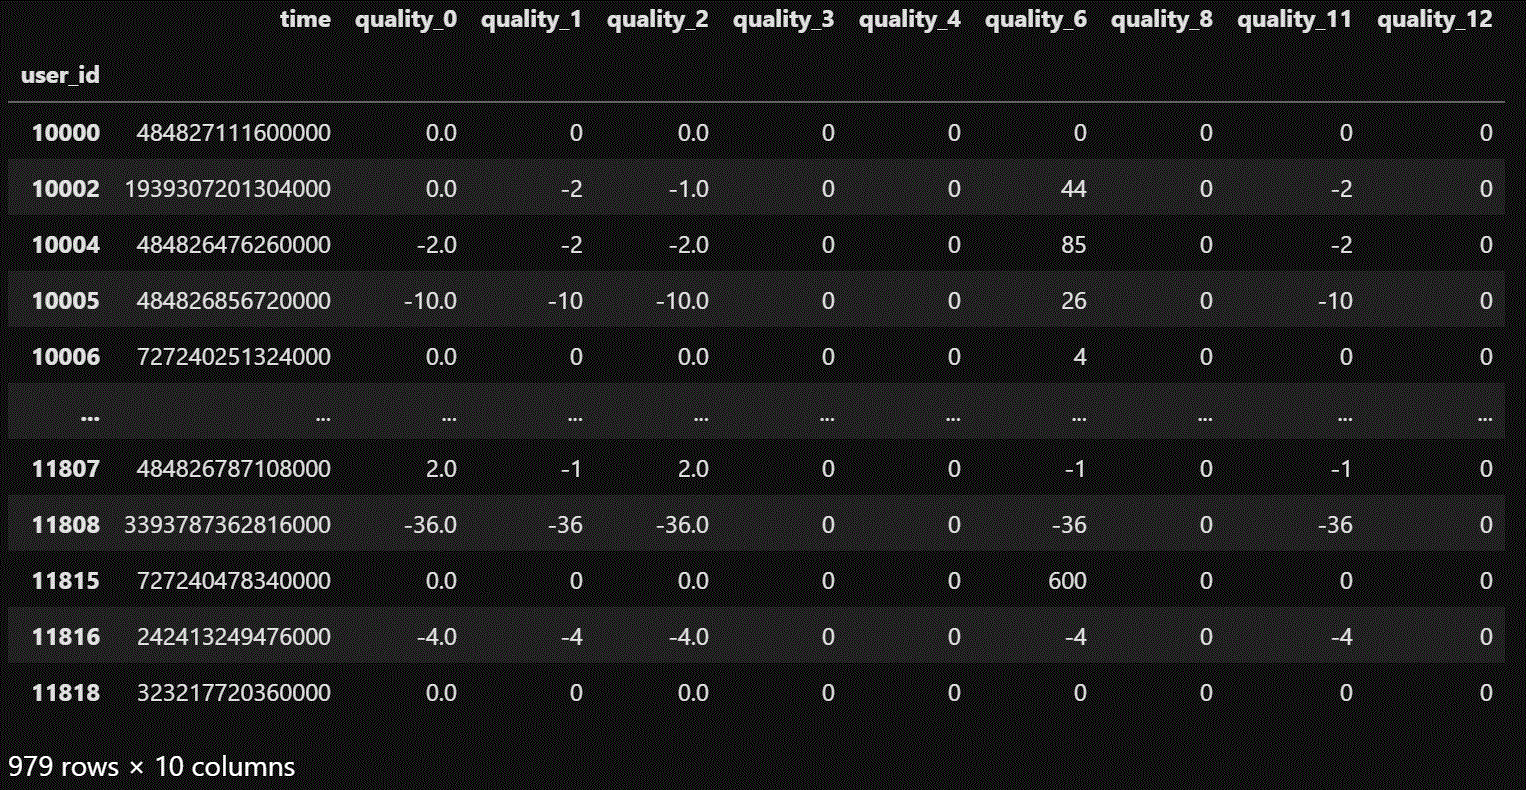

In [193]:
Image(filename= r"C:\Users\Wyatt\Desktop\q1.jpg",
     width = 700)

### Question_2

train_e 테이블에서 model_nm이 model_0인 값을 model_999로 바꾸고 싶다. 어떻게 해야 할까?

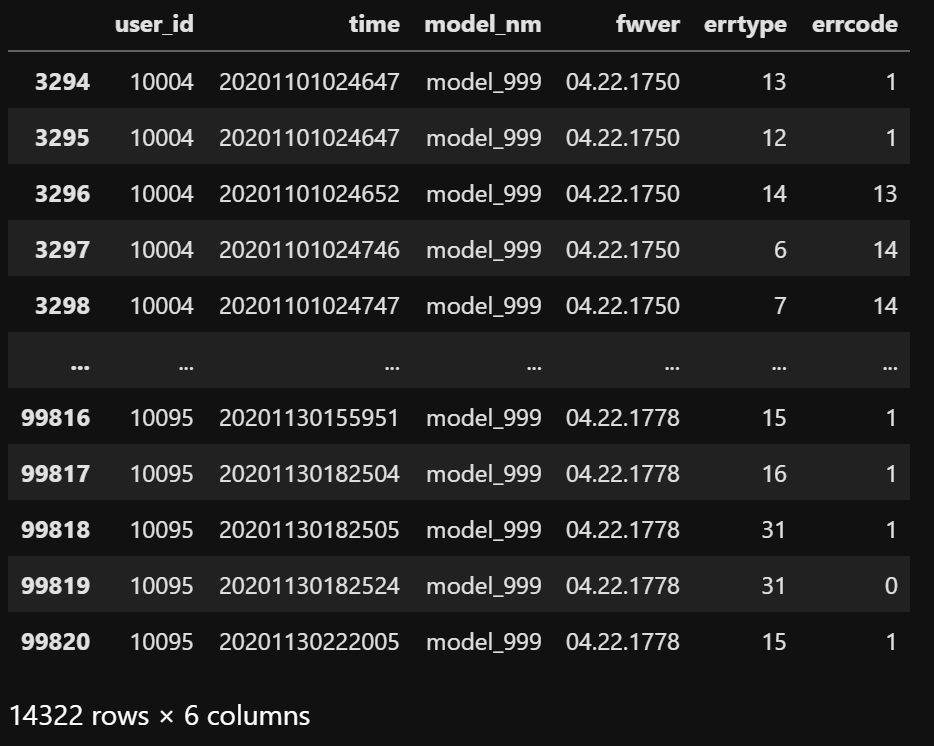

In [196]:
Image(filename= r"C:\Users\Wyatt\Desktop\q2.jpg",
     width = 500)

### Question_3

train_q 테이블에서 quality_0 컬럼에 0이 아닌 값만 유저를 기반으로 count하고 싶다. 어떻게 해야 할까?

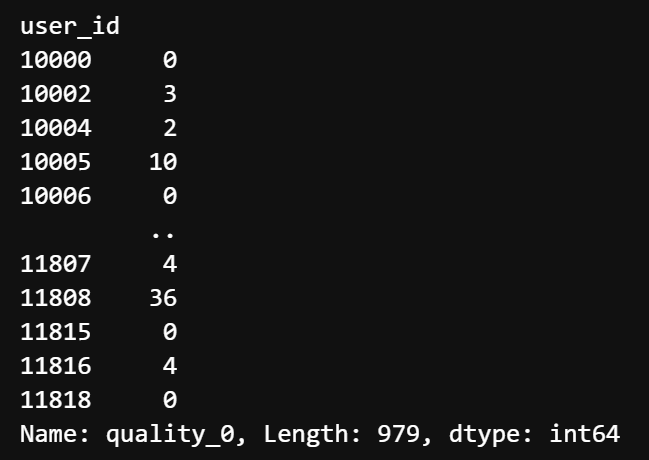

In [199]:
Image(filename= r"C:\Users\Wyatt\Desktop\q3.jpg",
     width = 400)

### Question_4

train_e 테이블에서 fwver에 '04' 가 포함되어 있는 row는 0, 그렇지 않은 row는 1로 받는 새로운 column을 만들고 싶다. 어떻게 해야 할까?

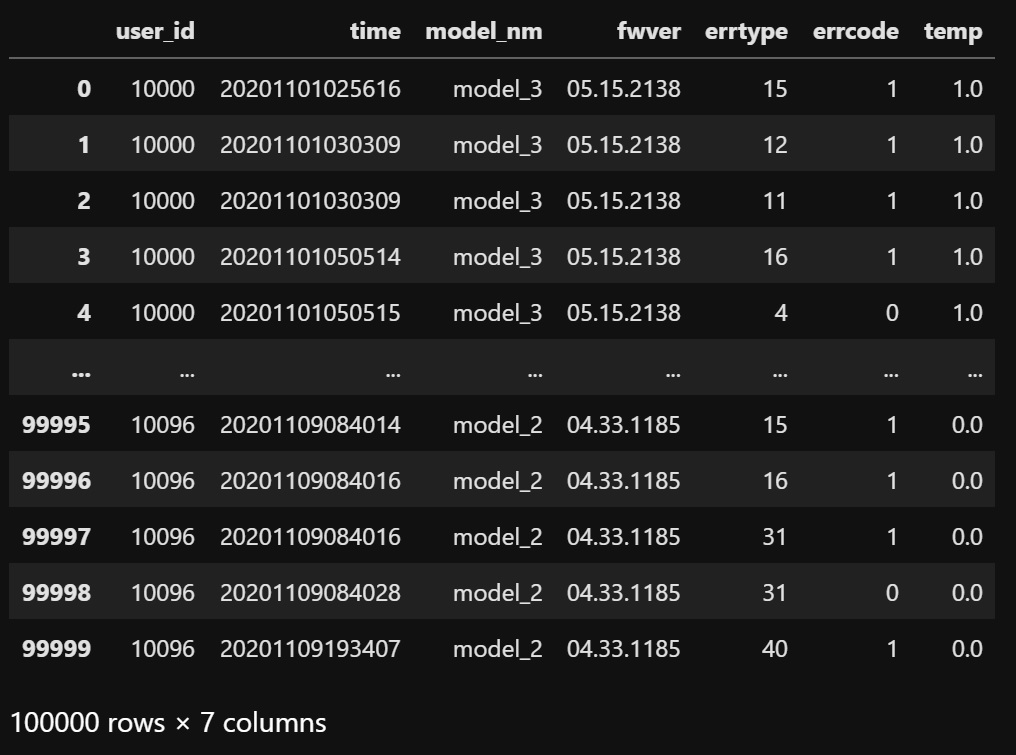

In [203]:
Image(filename= r"C:\Users\Wyatt\Desktop\q4.jpg",
     width = 550)